## our goal is to predict conversion rate and make recommendations to improve conversion

In [183]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [184]:
data = pd.read_csv('conversion_data.csv')

In [185]:
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [186]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


#### the max of age is 123, which seems to be abnormal 

In [187]:
data['age'].sort_values(ascending=False)

90928     123
295581    111
265167     79
192644     77
154217     73
         ... 
267312     17
116907     17
19652      17
116914     17
223133     17
Name: age, Length: 316200, dtype: int64

#### there are two people age 123 and 111, we should delete these two 

In [188]:
data = data[data['age']<111]
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


#### to look at each country's conversion rate specifically 

In [189]:
data.groupby(['country','converted']).count()

age  new_user  source  total_pages_visited
country converted                                               
China   0           76500     76500   76500                76500
        1             102       102     102                  102
Germany 0           12240     12240   12240                12240
        1             815       815     815                  815
UK      0           45900     45900   45900                45900
        1            2549      2549    2549                 2549
US      0          171360    171360  171360               171360
        1            6732      6732    6732                 6732

In [190]:
for country in ['China', 'Germany', 'UK', 'US']:
    conversion = len(data[(data['country']==country)&(data['converted']==1)]) / len(data[data['country']==country])
    print(country, ':', conversion)

China : 0.0013315579227696406
Germany : 0.062428188433550365
UK : 0.052612025015996204
US : 0.037800687285223365


<AxesSubplot:xlabel='country'>

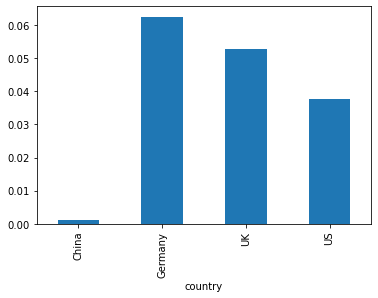

In [191]:
data.groupby('country')['converted'].mean().plot(kind='bar')

#### apparently, China has the lowest conversion rate and Germany has the highest 

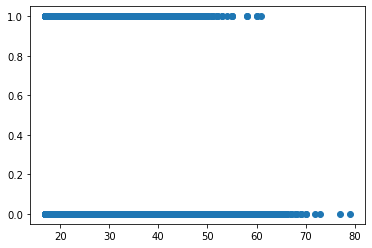

In [192]:
plt.scatter(data.age, data.converted)

#### apparently there is no conversion for people age over  

#### replace all texts into values 

In [153]:
data['country'] = data['country'].replace('China', 0)
data['country'] = data['country'].replace('Germany', 1)
data['country'] = data['country'].replace('UK', 2)
data['country'] = data['country'].replace('US', 3)

In [154]:
data['source'] = data['source'].replace('Seo', 0)
data['source'] = data['source'].replace('Ads', 1)
data['source'] = data['source'].replace('Direct', 2)

In [155]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,1,1,0
1,3,23,1,0,5,0
2,3,28,1,0,4,0
3,0,39,1,0,5,0
4,3,30,1,0,6,0


### conversion rate = number of converted / total number of sessions, next we calculate the current conversion rate

In [156]:
data[data['converted'] ==1]

,country,age,new_user,source,total_pages_visited,converted
54,3,25,1,2,18,1
72,3,33,0,0,15,1
87,3,18,0,2,19,1
130,3,17,0,1,19,1
182,3,19,0,1,9,1
...,...,...,...,...,...,...
316087,3,19,1,1,19,1
316088,3,28,0,0,15,1
316114,3,26,0,1,13,1
316128,3,17,0,2,13,1


In [157]:
conversion_rate = len(data[data['converted'] ==1]) / len(data['converted'])
conversion_rate

0.03225194340255157

#### to increase the conversion rate, we must increase the number of converted, so we need to first look at what factors will influence their converted decision 

#### because the outcome is binary, I will first try to fit a logistic regression model to see what factors contribute the most for conversion 

In [158]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
X = data.drop('converted', axis = 1)

In [160]:
y = data['converted']

In [161]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [162]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [163]:
model.classes_, model.intercept_, model.coef_

(array([0, 1]),
 array([-8.28460453]),
 array([[ 0.4771877 , -0.07560157, -1.73673935, -0.07277083,  0.7555342 ]]))

In [164]:
y_pred1 = model.predict_proba(X)
y_pred1

array([[9.99965491e-01, 3.45093957e-05],
       [9.98573275e-01, 1.42672495e-03],
       [9.99540305e-01, 4.59694776e-04],
       ...,
       [9.99272579e-01, 7.27420709e-04],
       [9.95906036e-01, 4.09396392e-03],
       [9.97965159e-01, 2.03484055e-03]])

In [165]:
y_pred2 = model.predict(X)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

### model evaluation 

In [166]:
model.score(X, y)

0.985569168685444

#### the accuracy is pretty high as 0.98 

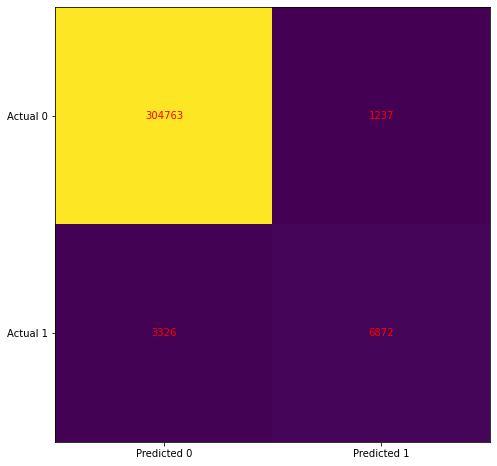

In [167]:
cm = confusion_matrix(y, y_pred2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [168]:
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    306000
           1       0.85      0.67      0.75     10198

    accuracy                           0.99    316198
   macro avg       0.92      0.83      0.87    316198
weighted avg       0.98      0.99      0.98    316198



#### next, I will try to determine which factors are most important to our model and increase those factors will increase conversion 

In [169]:
model.feature_names_in_

array(['country', 'age', 'new_user', 'source', 'total_pages_visited'],
      dtype=object)

In [170]:
feature_names = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
for feature_name in feature_names:
    data[feature_name] = data[feature_name] / data[feature_name].std()

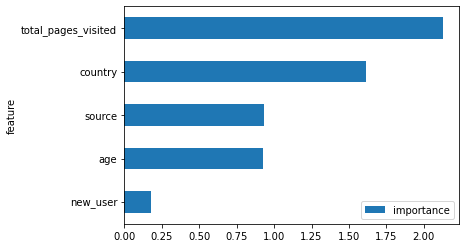

In [172]:
import math
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, model.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

#### we can see that total_pages_visited is the most important factor to our model, followed by country, source, age, and new_user 

#### based on our model, we can have the following recommendations:

#### 1. try to provide more promotion or reach out to customers who have a large number of total pages visited, they have higher desire and probability to make a purchase

#### 2. China seems to have a lower conversion rate than other countries, try to figure out whether the Chinese website version has some problems or bad translation that could result those problem and fix it

#### 3. German customers have the highest conversion rate, try to provide more promotion or coupons to encourage their purchase behavior

## Future improvement: 

#### if I had more time, I will also try other models such as random forest or decision trees to see if I can get better results 

#### I will also try to analyze the errors such as RMSE or other metrics to evaluate and pick a better model 